In [49]:
import pandas as pd

file_path = 'ECU_IoHT.xlsx'

try:
    df = pd.read_excel(file_path, engine='openpyxl')
except Exception as e:
    print(f"An error occurred: {e}")

***Enropy values are the same***

In [50]:
import pandas as pd
from scipy.stats import entropy
from collections import Counter

# Calculate entropy of time intervals between packets
df['Time_diff'] = df['Time'].diff().fillna(0)
time_diff_counts = Counter(df['Time_diff'])
time_diff_entropy = entropy(list(time_diff_counts.values()))

# Calculate entropy of packet lengths
length_counts = Counter(df['Length'])
length_entropy = entropy(list(length_counts.values()))

# Add entropy values as new features
df['Time_diff_entropy'] = time_diff_entropy
df['Length_entropy'] = length_entropy

In [51]:
df

,No.,Time,Source,Destination,Protocol,Length,Info,Type,Type of attack,Time_diff,Time_diff_entropy,Length_entropy
0,1,0.000000,Alfa_97:cf:63,Broadcast,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing,0.000000,7.869433,1.281906
1,2,0.002956,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing,0.002956,7.869433,1.281906
2,3,0.200725,Alfa_97:cf:63,Broadcast,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing,0.197769,7.869433,1.281906
3,4,0.202713,192.168.43.186,192.168.43.1,DNS,85,Standard query 0x0c44 PTR 1.43.168.192.in-addr...,Normal,No Attack,0.001988,7.869433,1.281906
4,5,0.411565,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing,0.208852,7.869433,1.281906
...,...,...,...,...,...,...,...,...,...,...,...,...
111202,111203,10103.029320,Alfa_97:cf:63,6e:c7:ec:3c:f2:ba,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing,1.277220,7.869433,1.281906
111203,111204,10103.140580,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing,0.111260,7.869433,1.281906
111204,111205,10103.383780,Alfa_97:cf:63,Broadcast,ARP,42,192.168.43.1 is at 00:c0:ca:97:cf:63 (duplicat...,Attack,ARP Spoofing,0.243200,7.869433,1.281906
111205,111206,10106.386960,Alfa_97:cf:63,Broadcast,ARP,42,192.168.43.1 is at 00:c0:ca:97:cf:63 (duplicat...,Attack,ARP Spoofing,3.003180,7.869433,1.281906


***Entropy values are not the same***

In [52]:
import pandas as pd
from scipy.stats import entropy
from collections import Counter

# Initialize columns for segmented entropies
df['Time_diff_segmented_entropy'] = 0.0
df['Length_segmented_entropy'] = 0.0

# Define the size of each segment
segment_size = 30

# Function to calculate entropy of a segment
def calculate_segment_entropy(column_values):
    counts = Counter(column_values)
    return entropy(list(counts.values()), base=2)  # Specifying base=2 for entropy in bits

# Calculate entropy for each segment
for start in range(0, df.shape[0], segment_size):
    end = start + segment_size
    # Ensure we don't go past the end of the DataFrame
    segment = df.iloc[start:end]
    if not segment.empty:
        time_diff_entropy = calculate_segment_entropy(segment['Time_diff'])
        length_entropy = calculate_segment_entropy(segment['Length'])
        df.loc[start:end, 'Time_diff_segmented_entropy'] = time_diff_entropy
        df.loc[start:end, 'Length_segmented_entropy'] = length_entropy

In [53]:
df

,No.,Time,Source,Destination,Protocol,Length,Info,Type,Type of attack,Time_diff,Time_diff_entropy,Length_entropy,Time_diff_segmented_entropy,Length_segmented_entropy
0,1,0.000000,Alfa_97:cf:63,Broadcast,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing,0.000000,7.869433,1.281906,4.440224,1.756149
1,2,0.002956,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing,0.002956,7.869433,1.281906,4.440224,1.756149
2,3,0.200725,Alfa_97:cf:63,Broadcast,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing,0.197769,7.869433,1.281906,4.440224,1.756149
3,4,0.202713,192.168.43.186,192.168.43.1,DNS,85,Standard query 0x0c44 PTR 1.43.168.192.in-addr...,Normal,No Attack,0.001988,7.869433,1.281906,4.440224,1.756149
4,5,0.411565,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing,0.208852,7.869433,1.281906,4.440224,1.756149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111202,111203,10103.029320,Alfa_97:cf:63,6e:c7:ec:3c:f2:ba,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing,1.277220,7.869433,1.281906,3.661933,2.520121
111203,111204,10103.140580,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing,0.111260,7.869433,1.281906,3.661933,2.520121
111204,111205,10103.383780,Alfa_97:cf:63,Broadcast,ARP,42,192.168.43.1 is at 00:c0:ca:97:cf:63 (duplicat...,Attack,ARP Spoofing,0.243200,7.869433,1.281906,3.661933,2.520121
111205,111206,10106.386960,Alfa_97:cf:63,Broadcast,ARP,42,192.168.43.1 is at 00:c0:ca:97:cf:63 (duplicat...,Attack,ARP Spoofing,3.003180,7.869433,1.281906,3.661933,2.520121


Protocol
ICMP       77920
TCP        23494
TLSv1.2     5891
ARP         2359
DNS         1242
TLSv1.1      143
OCSP         126
HTTP          14
DHCP          13
UDP            4
LLC            1
Name: count, dtype: int64


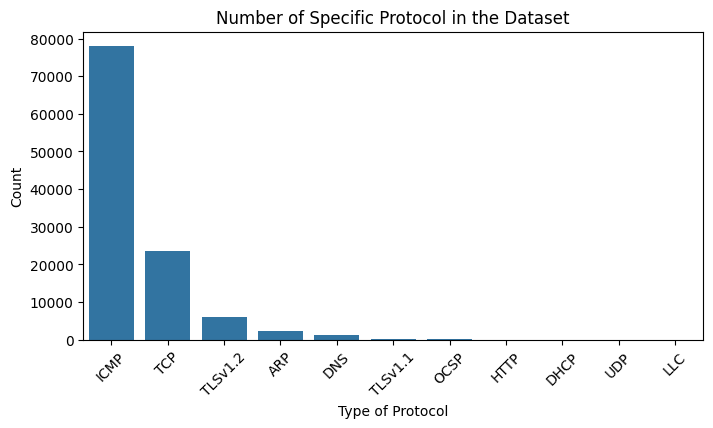

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

protocol_counts = df['Protocol'].value_counts()

print(protocol_counts)

# Plotting the counts as a barplot
plt.figure(figsize=(8, 4))
sns.barplot(x=protocol_counts.index, y=protocol_counts.values)
plt.title('Number of Specific Protocol in the Dataset')
plt.xlabel('Type of Protocol')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()


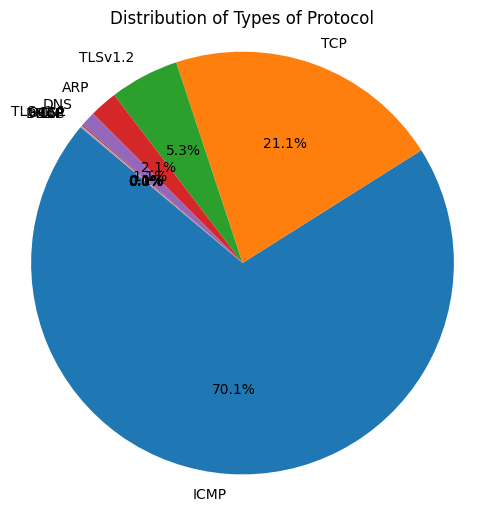

In [55]:
import matplotlib.pyplot as plt

protocol_counts = df['Protocol'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(protocol_counts, labels=protocol_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Distribution of Types of Protocol')
plt.show()

Type of attack
Smurf Attack      77920
No Attack         23453
Nmap Port Scan     6836
ARP Spoofing       2359
DoS Attack          639
Name: count, dtype: int64


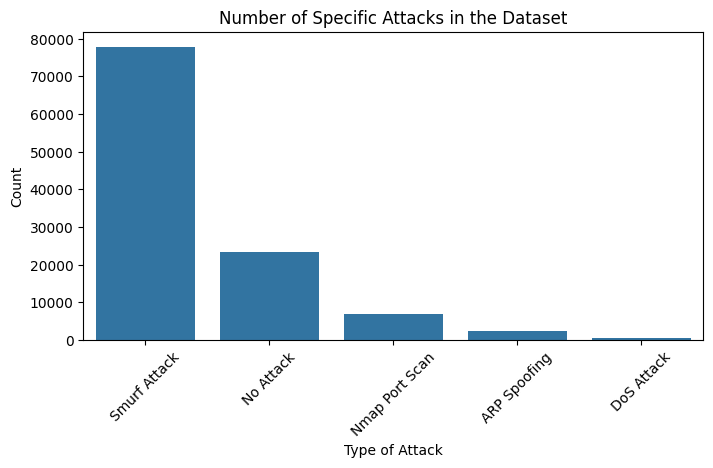

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

attack_counts = df['Type of attack'].value_counts()

print(attack_counts)

# Plotting the counts as a barplot
plt.figure(figsize=(8, 4))
sns.barplot(x=attack_counts.index, y=attack_counts.values)
plt.title('Number of Specific Attacks in the Dataset')
plt.xlabel('Type of Attack')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()


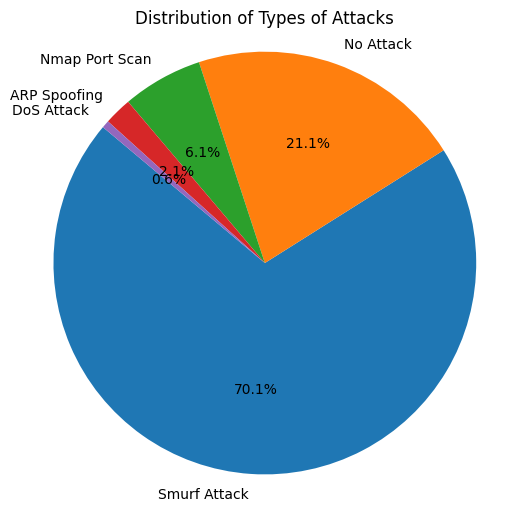

In [57]:
import matplotlib.pyplot as plt

attack_counts = df['Type of attack'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(attack_counts, labels=attack_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Distribution of Types of Attacks')
plt.show()


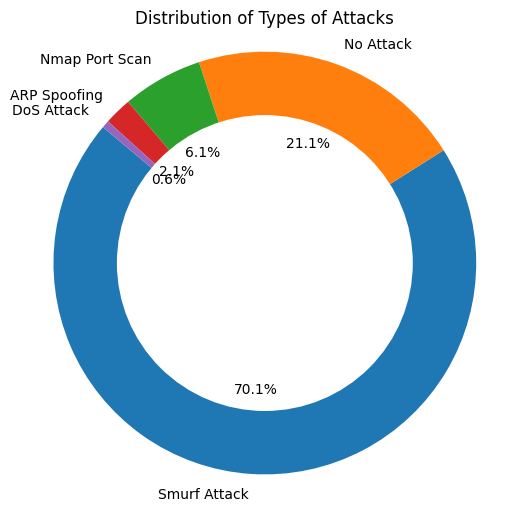

In [58]:
# Create a donut chart
plt.figure(figsize=(6, 6))
plt.pie(attack_counts, labels=attack_counts.index, autopct='%1.1f%%', startangle=140)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  
plt.title('Distribution of Types of Attacks')
plt.show()

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd


df = pd.get_dummies(df, columns=['Protocol'], drop_first=True)
df_with_dummies = pd.get_dummies(df, columns=['Type of attack'], prefix='type')
X = df_with_dummies[['Length', 'Time_diff', 'Time_diff_entropy', 'Length_entropy', 'Time_diff_segmented_entropy', 'Length_segmented_entropy'] + [col for col in df_with_dummies if col.startswith('Protocol_')]].values
type_cols = [col for col in df_with_dummies if col.startswith('type_')]
y = df_with_dummies[type_cols].values

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create decision tree classifier
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

In [60]:
pd.set_option('display.max_columns', None)
df_with_dummies.head()

,No.,Time,Source,Destination,Length,Info,Type,Time_diff,Time_diff_entropy,Length_entropy,Time_diff_segmented_entropy,Length_segmented_entropy,Protocol_DHCP,Protocol_DNS,Protocol_HTTP,Protocol_ICMP,Protocol_LLC,Protocol_OCSP,Protocol_TCP,Protocol_TLSv1.1,Protocol_TLSv1.2,Protocol_UDP,type_ARP Spoofing,type_DoS Attack,type_Nmap Port Scan,type_No Attack,type_Smurf Attack
0,1,0.000000,Alfa_97:cf:63,Broadcast,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,0.000000,7.869433,1.281906,4.440224,1.756149,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,2,0.002956,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,0.002956,7.869433,1.281906,4.440224,1.756149,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,3,0.200725,Alfa_97:cf:63,Broadcast,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,0.197769,7.869433,1.281906,4.440224,1.756149,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,4,0.202713,192.168.43.186,192.168.43.1,85,Standard query 0x0c44 PTR 1.43.168.192.in-addr...,Normal,0.001988,7.869433,1.281906,4.440224,1.756149,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
4,5,0.411565,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,0.208852,7.869433,1.281906,4.440224,1.756149,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Evaluate the classifier
accuracy = accuracy_score(y_test, clf.predict(X_test))
precision = precision_score(y_test, clf.predict(X_test), average='weighted')
recall = recall_score(y_test, clf.predict(X_test), average='weighted')
f1 = f1_score(y_test, clf.predict(X_test), average='weighted')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision* 100:.2f}%")
print(f"Recall: {recall* 100:.2f}%")
print(f"F1-Score: {f1* 100:.2f}%")

Accuracy: 98.77%
Precision: 98.88%
Recall: 98.77%
F1-Score: 98.83%


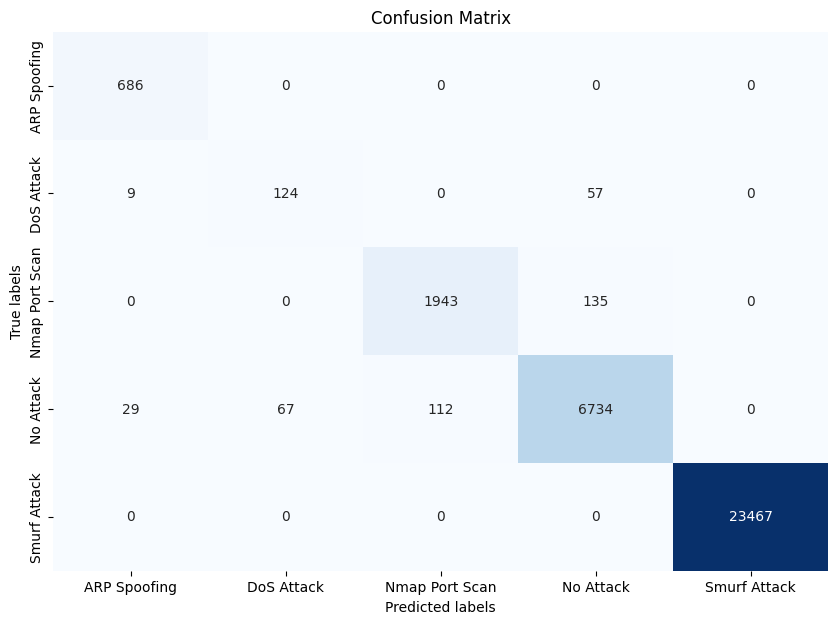

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Convert y_pred and y_test from one-hot encoded to label encoded
y_pred_label = np.argmax(y_pred, axis=1)
y_test_label = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_label, y_pred_label)

labels = ["ARP Spoofing", "DoS Attack", "Nmap Port Scan", "No Attack", "Smurf Attack"]

# Convert integers to corresponding strings from the labels array
y_pred_str = np.array(labels)[y_pred_label]
y_test_label = np.array(labels)[y_test_label]

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()  

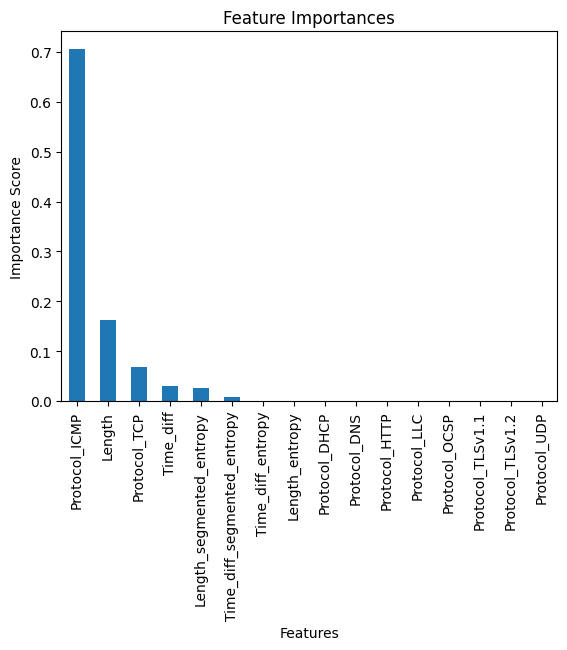

In [63]:
feature_importances = clf.feature_importances_

features = pd.Series(feature_importances, index = ['Length',
       'Time_diff', 'Time_diff_entropy', 'Length_entropy',
       'Time_diff_segmented_entropy', 'Length_segmented_entropy',
       'Protocol_DHCP', 'Protocol_DNS', 'Protocol_HTTP', 'Protocol_ICMP',
       'Protocol_LLC', 'Protocol_OCSP', 'Protocol_TCP', 'Protocol_TLSv1.1',
       'Protocol_TLSv1.2', 'Protocol_UDP'])

# Sort the features by importance
sorted_features = features.sort_values(ascending=False)

# Visualize the feature importances
import matplotlib.pyplot as plt
sorted_features.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

In [64]:
feature_importances

array([0.16294786, 0.02932732, 0.        , 0.        , 0.00847875,
       0.02531784, 0.        , 0.        , 0.        , 0.70588839,
       0.        , 0.        , 0.06803983, 0.        , 0.        ,
       0.        ])